In [1]:
import ipywidgets as widgets

In [35]:
slider = widgets.FloatSlider(
    value=7.5,
    min=5.0,
    max=10.0,
    step=0.1,
    description='Input:',
)

slider

FloatSlider(value=7.5, description='Input:', max=10.0, min=5.0)

In [39]:
!pwd

/Users/vaibhavjade/classwork/data science/hockey-primer-1/notebooks


In [20]:
import json
import os
import pandas as pd

In [21]:
f = open('/Users/vaibhavjade/classwork/data science/hockey-primer-1/data/trial.json')

In [22]:
sample = json.load(f)

sample

In [10]:
sample.keys()

dict_keys(['copyright', 'gamePk', 'link', 'metaData', 'gameData', 'liveData'])

In [28]:
sample['gameData'].keys()

dict_keys(['game', 'datetime', 'status', 'teams', 'players', 'venue'])

In [29]:
sample['gameData']['teams']

{'away': {'id': 18,
  'name': 'Nashville Predators',
  'link': '/api/v1/teams/18',
  'venue': {'id': 5030,
   'name': 'Bridgestone Arena',
   'link': '/api/v1/venues/5030',
   'city': 'Nashville',
   'timeZone': {'id': 'America/Chicago', 'offset': -5, 'tz': 'CDT'}},
  'abbreviation': 'NSH',
  'triCode': 'NSH',
  'teamName': 'Predators',
  'locationName': 'Nashville',
  'firstYearOfPlay': '1998',
  'division': {'id': 16, 'name': 'Central', 'link': '/api/v1/divisions/16'},
  'conference': {'id': 5, 'name': 'Western', 'link': '/api/v1/conferences/5'},
  'franchise': {'franchiseId': 34,
   'teamName': 'Predators',
   'link': '/api/v1/franchises/34'},
  'shortName': 'Nashville',
  'officialSiteUrl': 'http://www.nashvillepredators.com',
  'franchiseId': 34,
  'active': True},
 'home': {'id': 5,
  'name': 'Pittsburgh Penguins',
  'link': '/api/v1/teams/5',
  'venue': {'id': 5034,
   'name': 'PPG Paints Arena',
   'link': '/api/v1/venues/5034',
   'city': 'Pittsburgh',
   'timeZone': {'id': 'A

In [23]:
data = sample['liveData']['plays']['allPlays'][6]

In [33]:
for i in sample['liveData']['plays']['allPlays']:
    print(i.keys())

dict_keys(['result', 'about', 'coordinates'])
dict_keys(['result', 'about', 'coordinates'])
dict_keys(['result', 'about', 'coordinates'])
dict_keys(['players', 'result', 'about', 'coordinates', 'team'])
dict_keys(['players', 'result', 'about', 'coordinates', 'team'])
dict_keys(['players', 'result', 'about', 'coordinates', 'team'])
dict_keys(['players', 'result', 'about', 'coordinates', 'team'])
dict_keys(['players', 'result', 'about', 'coordinates', 'team'])
dict_keys(['players', 'result', 'about', 'coordinates', 'team'])
dict_keys(['players', 'result', 'about', 'coordinates', 'team'])
dict_keys(['players', 'result', 'about', 'coordinates', 'team'])
dict_keys(['players', 'result', 'about', 'coordinates', 'team'])
dict_keys(['players', 'result', 'about', 'coordinates', 'team'])
dict_keys(['players', 'result', 'about', 'coordinates', 'team'])
dict_keys(['players', 'result', 'about', 'coordinates', 'team'])
dict_keys(['players', 'result', 'about', 'coordinates', 'team'])
dict_keys(['playe

In [24]:
df = pd.DataFrame.from_dict(sample['liveData']['plays']['allPlays'])

In [3]:
import numpy as np
from matplotlib import pyplot as plt


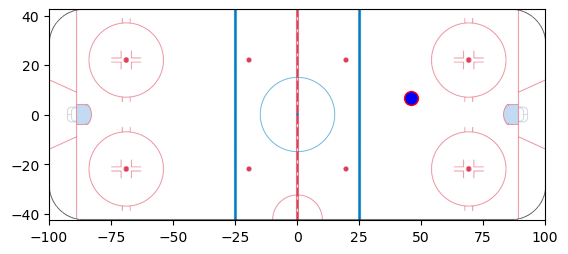

In [32]:
im = plt.imread('../figures/nhl_rink.png')
# dim (467,1100,4)
fig, ax = plt.subplots()
ax.imshow(im, extent=[-100,100,-42.5,42.5])
#x = np.array(range(300))
ax.plot(data['coordinates']['x'],data['coordinates']['y'], marker='o',markersize=10, markeredgecolor="red", markerfacecolor="blue")
plt.show()

In [24]:
data['coordinates']

{'x': 46.0, 'y': 7.0}

In [91]:
def plot_image(corr,desc):
    im = plt.imread('../figures/nhl_rink.png')
    fig, ax = plt.subplots()
    fig.suptitle(desc,y=0.8)
    ax.imshow(im, extent=[-100,100,-42.5,42.5])
    # plotting the point
    ax.plot(corr['x'],corr['y'], marker='o',markersize=10, markeredgecolor="red", markerfacecolor="blue")

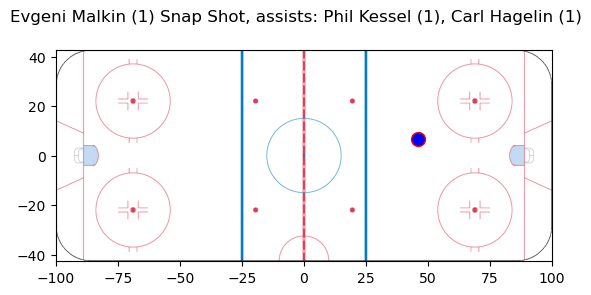

In [92]:
plot_image(data['coordinates'],data['result']['description'])

In [56]:
sample['liveData']['plays']['allPlays'][0]

{'result': {'event': 'Game Scheduled',
  'eventCode': 'PIT1',
  'eventTypeId': 'GAME_SCHEDULED',
  'description': 'Game Scheduled'},
 'about': {'eventIdx': 0,
  'eventId': 1,
  'period': 1,
  'periodType': 'REGULAR',
  'ordinalNum': '1st',
  'periodTime': '00:00',
  'periodTimeRemaining': '20:00',
  'dateTime': '2017-10-07T22:13:48Z',
  'goals': {'away': 0, 'home': 0}},
 'coordinates': {}}

In [62]:
event_arr = sample['liveData']['plays']['allPlays']

In [66]:
def event_vis(event):
    if event.get('coordinates') != {}:
        plot_image(event.get('coordinates'),event['result']['description'])
        plt.show()
    print(json.dumps(event,indent=4))

In [67]:
def game_vis(x):
    # intlsider for changing the scroll
    # HTML widget for the display for event data plus plot image(diff widget maybe)
    event = event_arr[x]
    event_vis(event)

In [93]:
widgets.interact(game_vis,x=widgets.IntSlider(min=0, max=len(event_arr), step=1, value=10))

interactive(children=(IntSlider(value=10, description='x', max=331), Output()), _dom_classes=('widget-interact…

<function __main__.game_vis(x)>